In [177]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from collections import Counter

### 创建范围在[0,L]的多智能体

In [178]:
def creat_agents(L):
    """
    输入：
    L scaler 范围
    
    输出：
    X nparray(n,)
    """
    X = np.linspace(0,L,100*L)
    return X

### 智能体更新

In [179]:
def opinion_update(X_t):
    """
    输入：
    X_t        ndarray(n,)  
    
    输出：
    X_         ndarray(n,)
    """
    m = X_t.shape[0]
    X_ = np.zeros(m)
    
    for i in range(m):
        neighbor = 0
        times = 0
        for j in range(m):
             if(np.abs(X_t[i] - X_t[j]) < 1):
                neighbor += X_t[j]
                times += 1
        X_[i] = neighbor/times
    return X_

### 找收敛点

In [180]:
def get_clusters(L,X):
    """
    输入：
    L scaler
    X ndarray(n,)
    输出：
    L_result ndarray
    """
    m = X.shape[0]
    L_all =[]
    L_set = set()
    L_result = []
    index_num = L + 1
    for i in range(index_num):
        index = (int)(m/L)*i - 1
        L_all.append(X[index])
    for num in L_all:
        if num not in L_result:
            L_set.add(num)
            L_result.append(num)
    L_result = np.array(L_result)

    return L_result

In [181]:
X_10 = creat_agents(10)

In [191]:
def update_and_plot(X, iteration):
    m = X.shape[0]
    y_0 = np.zeros(m)
    plt.figure(figsize=(5,5))
    plt.scatter(y_0,X,s=1)

    for i in range(iteration):
        y = y_0 + i
        X = opinion_update(X)
        plt.scatter(y,X,s=1)
    return X

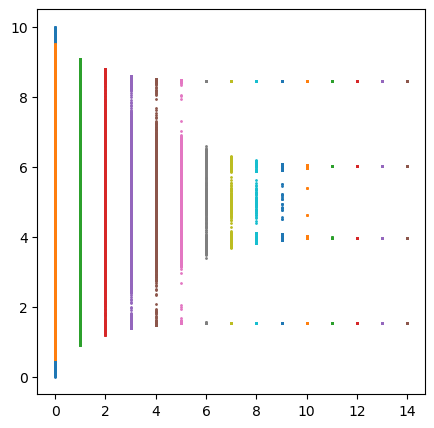

In [192]:
X_10_result = update_and_plot(X_1,15)

In [193]:
X_10_L = get_clusters(10,X_10_result)
X_10_L

array([8.45858825, 1.54141175, 3.9728637 , 6.0271363 ])

In [194]:
def get_and_draw(L,X_clusters):
    m = X_clusters.shape[0]
    distance = np.zeros(m)
    distance = distance + L/2
    y = X_clusters - distance
    x = np.zeros(m)
    x = x + L
    for i in range(m):
        plt.scatter(x[i],y[i],s=1)
    return y

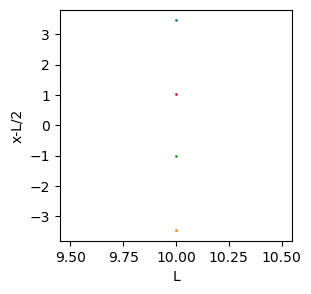

In [195]:
plt.figure(figsize=(3,3))
plt.xlabel("L")
plt.ylabel("x-L/2")
y = get_and_draw(10,X_10_L)

In [187]:
y

array([ 3.45858825, -3.45858825, -1.0271363 ,  1.0271363 ])